Olimpinių žaidinių istoriniai duomenys (1896-2016 metai)

Duomenų analizė atliekama remiantis istoriniais duomenimis apie šiuolaikines olimpines žaidynes nuo 1896 m. Atėnų iki 2016 m. Rio de Žaneiro. Kiekviena eilutė atitinka individualų sportininką, besivaržantį individualioje rungtyje, įskaitant sportininko vardą, lytį, amžių, ugį, svorį, šalį, sezoną, metus, miestą, sporto šaką, rungties pavadinimą bei laimėtą medalį.

Duomenis galima rasti: https://www.mavenanalytics.io/data-playground?page=3&pageSize=5

Užduotys:
1. Apskaičiuoti, kokį procentą dalyvių per visą olimpinių varžybų laikotarpį sudarė moterys ir vyrai.
2. Palygnti žiemos ir vasaros žaidines dalyvių skaičiumi, dalyvavusiomis šalimis ir rungčių bei sporto šakų skaičiumi.
3. Nustatyti top 10 šalių laimėjųsių daugiausiai aukso, sidabro, bronzos medalių.
4. Išanalizuoti, kurios šalys siųsdavo daugiausiai sportininkų dalyvauti žaidynėse ir ar tos šalys laimėdavo daugiausiai medalių.
5. Kiek Lietuvos sportininkai yra laimėję medalių? TOP 10 Lietuvos medalininkų? Kokio vidutinio amžiaus būdami Lietuviai dažniausiai laimėdavo medalius?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
olympic0 = pd.read_csv('athlete_events.csv')
olympic = pd.read_csv('athlete_events.csv')
olympic2 = pd.read_csv('athlete_events.csv')
olympic3 = pd.read_csv('athlete_events.csv')

In [66]:
olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [67]:
olympic.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
olympic.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
print('Duomenų rinkinį sudaro:',len(olympic),'eilutės')
print()

Duomenų rinkinį sudaro: 271116 eilutės



In [5]:
pd.isna(olympic).sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [6]:
olympic0['Medal'] = olympic0['Medal'].fillna('Not win')
olympic0['Age'] = olympic0['Age'].fillna(0)
olympic0.pop('Height')
olympic0.pop('Weight')
olympic0.pop('Games')

olympic['Medal'] = olympic['Medal'].fillna('Not win')
olympic['Age'] = olympic['Age'].fillna(0)
olympic.pop('Height')
olympic.pop('Weight')
olympic.pop('Games')

olympic2['Medal'] = olympic2['Medal'].fillna('Not win')
olympic2['Age'] = olympic2['Age'].fillna(0)
olympic2.pop('Height')
olympic2.pop('Weight')
olympic2.pop('Games')

olympic3['Age'] = olympic3['Age'].fillna(0)
olympic3.pop('Height')
olympic3.pop('Weight')
olympic3.pop('Games')


0         1992 Summer
1         2012 Summer
2         1920 Summer
3         1900 Summer
4         1988 Winter
             ...     
271111    1976 Winter
271112    2014 Winter
271113    2014 Winter
271114    1998 Winter
271115    2002 Winter
Name: Games, Length: 271116, dtype: object

In [7]:
pd.isna(olympic).sum()

ID        0
Name      0
Sex       0
Age       0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [8]:
pd.isna(olympic2).sum()

ID        0
Name      0
Sex       0
Age       0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [9]:
#1. Apskaičiuoti, kokį procentą dalyvių per visą 1896-2016 metų laikotarpį sudarė moterys ir vyrai.
Unikalūs_id = olympic0.drop_duplicates(subset=['ID'])
Unikalūs_id.groupby(['Sex']).count()['ID']
print(Unikalūs_id.groupby(['Sex']).count()['ID'])


Sex
F     33981
M    101590
Name: ID, dtype: int64


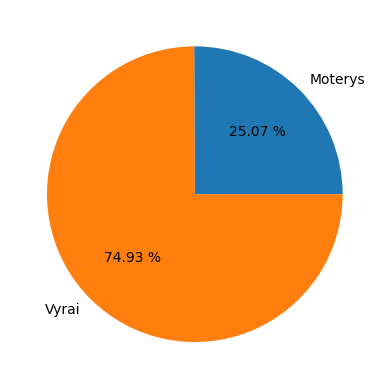

In [10]:
Moterys = Unikalūs_id.loc[Unikalūs_id['Sex'] == 'F'].count()['Sex']   
Vyrai = Unikalūs_id.loc[Unikalūs_id['Sex'] == 'M'].count()['Sex']

labels = ['Moterys', 'Vyrai']
plt.pie([Moterys, Vyrai], labels= labels, autopct='%.2f %%')

plt.show()

In [12]:
#2.  Palygnti žiemos ir vasaros žaidines dalyvių skaičiumi, dalyvavusiomis šalimis ir rungčių bei sporto šakų skaičiumi.

#Sukuriamos atskiros lentelės tik su Winter ir tik su Summer
olympic.drop(olympic[olympic['Season'] == 'Winter']. index, inplace = True)
olympic2.drop(olympic2[olympic2['Season'] == 'Summer']. index, inplace = True)

Dalyvių_sk_vasaros = olympic['ID'].nunique()
Dalyvių_sk_žiemos = olympic2['ID'].nunique()


skirtumas1 = Dalyvių_sk_vasaros - Dalyvių_sk_žiemos
skirtumas2 = Dalyvių_sk_žiemos - Dalyvių_sk_vasaros

if Dalyvių_sk_žiemos > Dalyvių_sk_vasaros:
    print(f'Žiemos olimpinėse žaidynėse yra dalyvavę {Dalyvių_sk_žiemos} sportininkai, tai yra {skirtumas2} sportininkais daugiau nei yra dalyvavę vasaros žaidynėse ({Dalyvių_sk_vasaros})')
elif Dalyvių_sk_žiemos < Dalyvių_sk_vasaros:
    print(f'Vasaros olimpinėse žaidynėse yra dalyvavę {Dalyvių_sk_vasaros} sportininkai, tai yra {skirtumas1} sportininkais daugiau nei yra dalyvavę žiemos žaidynėse ({Dalyvių_sk_žiemos})')
else:
    ('Vasaros ir žiemos olimpinėse žaidynėse dalyvavo vienodas skaičius sportininkų')

Vasaros olimpinėse žaidynėse yra dalyvavę 116776 sportininkai, tai yra 97818 sportininkais daugiau nei yra dalyvavę žiemos žaidynėse (18958)


In [13]:
#Apksaičiuoja, kiek kiekvienose žaidynėse buvo unikalių sporto šakų per visą laikotarpį
Sporto_šakų_vasaros = olympic['Sport'].nunique()
Sporto_šakų_žiemos = olympic2['Sport'].nunique()

#Apksaičiuoja, kiek kiekvienose žaidynėse buvo unikalių sporto rungčių per visą laikotarpį
Sporto_rungčių_vasaros = olympic['Event'].nunique()
Sporto_rungčių_žiemos = olympic2['Event'].nunique()

#Apksaičiuoja, kiek kiekvienose žaidynėse dalyvavo unikalių šalių
Šalių_vasaros = olympic['NOC'].nunique()
Šalių_žiemos = olympic2['NOC'].nunique()

Vasaros_šakų_skirtumas = Sporto_šakų_vasaros - Sporto_šakų_žiemos
Žiemos_šakų_skirtumas = Sporto_šakų_žiemos - Sporto_šakų_vasaros

Vasaros_rungčių_skirtumas = Sporto_rungčių_vasaros - Sporto_rungčių_žiemos
Žiemos_rungčių_skirtumas = Sporto_rungčių_žiemos - Sporto_rungčių_vasaros

Vasaros_šalių_skirtumas = Šalių_vasaros - Šalių_žiemos
Žiemos_šalių_skirtumas = Šalių_žiemos - Šalių_vasaros

if Sporto_šakų_vasaros > Sporto_šakų_žiemos:
    print(f'Vasaros žaidynėse buvo {Sporto_šakų_vasaros} sporto šakos, kas yra {Vasaros_šakų_skirtumas} sporto šakomis daugiau negu žiemos žaidynėse ({Sporto_šakų_žiemos})')
elif Sporto_šakų_vasaros < Sporto_šakų_žiemos:
    print(f'Žiemos žaidynėse buvo {Sporto_šakų_žiemos} sporto šakos, kas yra {Žiemos_šakų_skirtumas} sporto šakomis daugiau negu vasaros žaidynėse ({Sporto_šakų_vasaros})')
else:
    print('Vasaros ir žiemos žaidynėse sporto šakų buvo po tiek pat')

print()

if Sporto_rungčių_vasaros > Sporto_rungčių_žiemos:
    print(f'Vasaros žaidynėse buvo {Sporto_rungčių_vasaros} sporto rungtys, kas yra {Vasaros_rungčių_skirtumas} sporto rungtimis daugiau negu žiemos žaidynėse ({Sporto_rungčių_žiemos})')
elif Sporto_rungčių_vasaros < Sporto_rungčių_žiemos:
    print(f'Žiemos žaidynėse buvo {Sporto_rungčių_žiemos} sporto rungtys, kas yra {Žiemos_rungčių_skirtumas} sporto rungtimis daugiau negu vasaros žaidynėse ({Sporto_rungčių_vasaros})')
else:
    print('Vasaros ir žiemos žaidynėse sporto rungčių buvo po tiek pat')

print()

if Šalių_vasaros > Šalių_žiemos:
    print(f'Vasaros žaidynėse iš viso dalyvavo {Šalių_vasaros} šalių, kas yra {Vasaros_šalių_skirtumas} šalimis daugiau negu žiemos žaidynėse ({Šalių_žiemos})')
elif Šalių_vasaros < Šalių_žiemos:
    print(f'Žiemos žaidynėse iš viso dalyvavo {Šalių_žiemos} šalių, kas yra {Žiemos_šalių_skirtumas} šalimis daugiau negu vasaros žaidynėse ({Šalių_vasaros})')
else:
    print('Vasaros ir žiemos žaidynėse sporto rungčių buvo po tiek pat')





Vasaros žaidynėse buvo 52 sporto šakos, kas yra 35 sporto šakomis daugiau negu žiemos žaidynėse (17)

Vasaros žaidynėse buvo 651 sporto rungtys, kas yra 532 sporto rungtimis daugiau negu žiemos žaidynėse (119)

Vasaros žaidynėse iš viso dalyvavo 230 šalių, kas yra 111 šalimis daugiau negu žiemos žaidynėse (119)


[Text(0, 0, '17'), Text(0, 0, '119'), Text(0, 0, '119')]

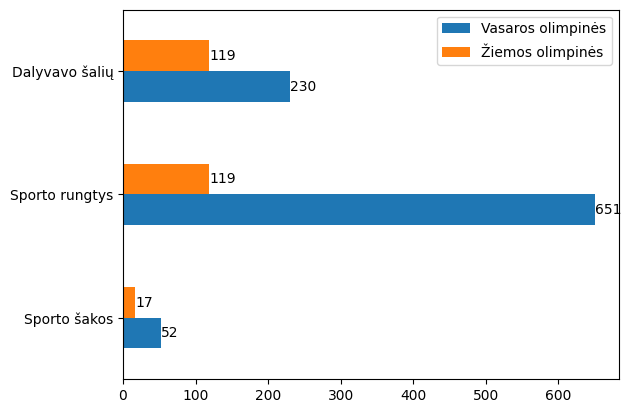

In [14]:
diagramai = pd.DataFrame({
    'Vasaros olimpinės': [Sporto_šakų_vasaros, Sporto_rungčių_vasaros, Šalių_vasaros],
    'Žiemos olimpinės': [Sporto_šakų_žiemos, Sporto_rungčių_žiemos, Šalių_žiemos]},
     index= ['Sporto šakos', 'Sporto rungtys', 'Dalyvavo šalių'])

ax = diagramai.plot.barh()
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])







In [27]:
#3. Nustatyti top 10 šalių laimėjųsių daugiausiai: 
    #aukso medalių; 
    #sidabro medalių;
    #bronzos medalių.

#Vasaros olimpinėse laimėtų aukso medalių statistika
Laimėti_aukso_vasaros = olympic.groupby('NOC')['Medal'].apply(lambda x: (x=='Gold').sum()).reset_index(name='Laimėti aukso medaliai')
Laimėti_aukso_vasaros.sort_values('Laimėti aukso medaliai', ascending=False).head(10)

,NOC,Laimėti aukso medaliai
216,USA,2472
214,URS,832
74,GBR,636
79,GER,592
100,ITA,518
69,FRA,465
90,HUN,432
193,SWE,354
12,AUS,342
76,GDR,339


In [29]:
#Žiemos olimpinėse žaidynėse laimėtų aukso medalių statistika
Laimėti_aukso_žiemos = olympic2.groupby('NOC')['Medal'].apply(lambda x: (x=='Gold').sum()).reset_index(name='Laimėti aukso medaliai')

Laimėti_aukso_žiemos.sort_values('Laimėti aukso medaliai', ascending=False).head(10)

,NOC,Laimėti aukso medaliai
17,CAN,305
112,URS,250
114,USA,166
41,GER,153
80,NOR,151
100,SWE,125
92,RUS,94
8,AUT,79
98,SUI,76
35,FIN,66


In [30]:
#Vasaros olimpinėse žaidynėse laimėtų sidarbo medalių statistika
Laimėti_sidabro_vasaros = olympic.groupby('NOC')['Medal'].apply(lambda x: (x=='Silver').sum()).reset_index(name='Laimėti sidabro medaliai')
Laimėti_sidabro_vasaros.sort_values('Laimėti sidabro medaliai', ascending=False).head(10)

,NOC,Laimėti sidabro medaliai
216,USA,1333
74,GBR,729
214,URS,635
69,FRA,575
79,GER,538
100,ITA,474
12,AUS,452
193,SWE,396
90,HUN,328
41,CHN,317


In [31]:
#Žiemos olimpinėse žaidynėse laimėtų sidarbo medalių statistika
Laimėti_sidabro_žiemos = olympic2.groupby('NOC')['Medal'].apply(lambda x: (x=='Silver').sum()).reset_index(name='Laimėti sidabro medaliai')
Laimėti_sidabro_žiemos.sort_values('Laimėti sidabro medaliai', ascending=False).head(10)

,NOC,Laimėti sidabro medaliai
114,USA,308
17,CAN,199
80,NOR,165
35,FIN,145
41,GER,136
100,SWE,126
8,AUT,98
112,URS,97
92,RUS,89
102,TCH,81


In [32]:
#Vasaros olimpinėse žaidynėse laimėtų bronzos medalių statistika
Laimėti_bronzos_vasaros = olympic.groupby('NOC')['Medal'].apply(lambda x: (x=='Bronze').sum()).reset_index(name='Laimėti bronzos medaliai')
Laimėti_bronzos_vasaros.sort_values('Laimėti bronzos medaliai', ascending=False).head(10)

,NOC,Laimėti bronzos medaliai
216,USA,1197
79,GER,649
74,GBR,620
214,URS,596
69,FRA,587
12,AUS,510
100,ITA,454
145,NED,371
90,HUN,363
193,SWE,358


In [33]:
#Žiemos olimpinėse žaidynėse laimėtų bronzos medalių statistika
Laimėti_bronzos_žiemos = olympic2.groupby('NOC')['Medal'].apply(lambda x: (x=='Bronze').sum()).reset_index(name='Laimėti bronzos medaliai')
Laimėti_bronzos_žiemos.sort_values('Laimėti bronzos medaliai', ascending=False).head(10)

,NOC,Laimėti bronzos medaliai
35,FIN,215
100,SWE,177
114,USA,161
98,SUI,129
80,NOR,127
17,CAN,107
8,AUT,103
41,GER,97
112,URS,93
36,FRA,79


In [34]:
#4. Išanalizuoti, kurios šalys siųsdavo daugiausiai sportininkų dalyvauti žaidynėse ir ar tos šalys laimėdavo daugiausiai medalių.
Vasaros_olimpinių_dalyviai = olympic.groupby('NOC')['ID'].count()
Vasaros_olimpinių_dalyviai.sort_values(ascending=False).head(5)

NOC
USA    15064
GBR    10917
FRA    10633
ITA     8217
GER     7622
Name: ID, dtype: int64

In [35]:
Žiemos_olimpinių_dalyviai = olympic2. groupby('NOC')['ID'].count()
Žiemos_olimpinių_dalyviai.sort_values(ascending=False).head(5)

NOC
USA    3789
CAN    2873
ITA    2498
NOR    2362
SWE    2263
Name: ID, dtype: int64

In [36]:
#5. Kiek Lietuvos sportininkai yra laimėję medalių? TOP 10 Lietuvos medalininkų? Kokio vidutinio amžiaus būdami Lietuviai dažniausiai laimėdavo medalius?
Lietuvių_laimėti_medaliai_vasaros = olympic.groupby('Medal')['NOC'].apply(lambda x: (x=='LTU').sum()).reset_index(name='Laimėti medaliai vasaros')
print(Lietuvių_laimėti_medaliai_vasaros)
print()
Lietuvių_laimėti_medaliai_žiemos = olympic2.groupby('Medal')['NOC'].apply(lambda x: (x=='LTU').sum()).reset_index(name='Laimėti medaliai žiemos')
print(Lietuvių_laimėti_medaliai_žiemos)

     Medal  Laimėti medaliai vasaros
0   Bronze                        48
1     Gold                         6
2  Not win                       477
3   Silver                         7

     Medal  Laimėti medaliai žiemos
0   Bronze                        0
1     Gold                        0
2  Not win                      116
3   Silver                        0


In [37]:
#TOP 10 Lietuvos medalininkų?

olympic3=olympic3.dropna()
olympic3.drop(olympic3[olympic3['NOC'] != 'LTU']. index, inplace = True)

Lietuvos_medalininkai = olympic3.groupby('Name')['Medal'].count()
Lietuvos_medalininkai.sort_values(ascending=False).head(10)

Name
Virgilijus Alekna              3
Gintaras Einikis               3
Rimas Kurtinaitis              2
Andrejus Zadneprovskis         2
Artras Karniovas               2
Arvydas Romas Sabonis          2
Saulius tombergas              2
Eurelijus ukauskas             2
Raimondas arnas Mariulionis    2
Aleksandras Kazakeviius        1
Name: Medal, dtype: int64

In [38]:
#Kokio vidutinio amžiaus būdami Lietuviai dažniausiai laimėdavo medalius?
pagal_medalius=round(olympic3.groupby('Medal')['Age'].mean(),0)
print('Medaliai laimimi pagal amžių:','\n',pagal_medalius)

Medaliai laimimi pagal amžių: 
 Medal
Bronze    27.0
Gold      28.0
Silver    28.0
Name: Age, dtype: float64


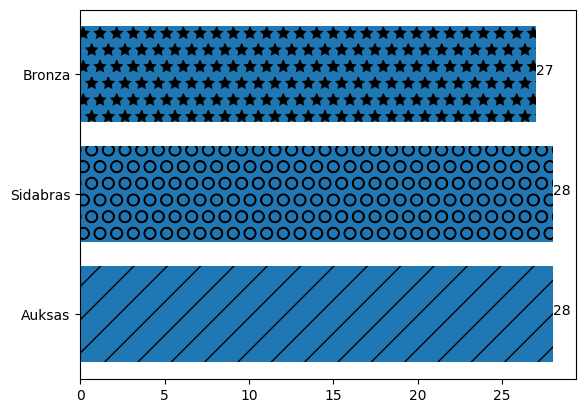

In [39]:
Medaliai = ['Auksas', 'Sidabras', 'Bronza']
Vidutinis_amžius = [28, 28, 27]

bars = plt.barh(Medaliai, Vidutinis_amžius)
bars[0].set_hatch('/')
bars[1].set_hatch('O')
bars[2].set_hatch('*')



for index, value in enumerate(Vidutinis_amžius):
    plt.text(value, index,
             str(value))
 
plt.show()

